*Based on the datasets given, we classify a flower group(Iris) into different Species by using the Decision Tree Classifier Algorithm*

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
e_iris=pd.read_csv(r"C:\Users\Annapurna Vinod\Downloads\Iris.csv")
e_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
e_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
e_iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
e_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
e_iris.drop('Id',axis=1,inplace=True)

2D Scatterplot Rep

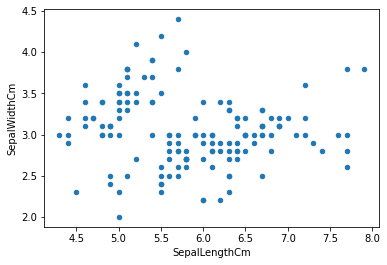

In [7]:
e_iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
plt.show()

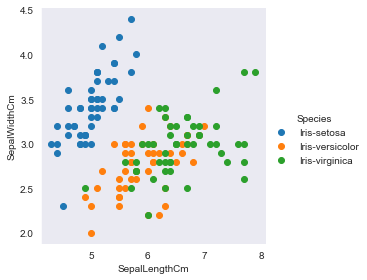

In [8]:
sns.set_style("dark")
sns.FacetGrid(e_iris,hue="Species", height=4).map(plt.scatter,"SepalLengthCm", "SepalWidthCm").add_legend();
plt.show()

3D Scatterplot Rep

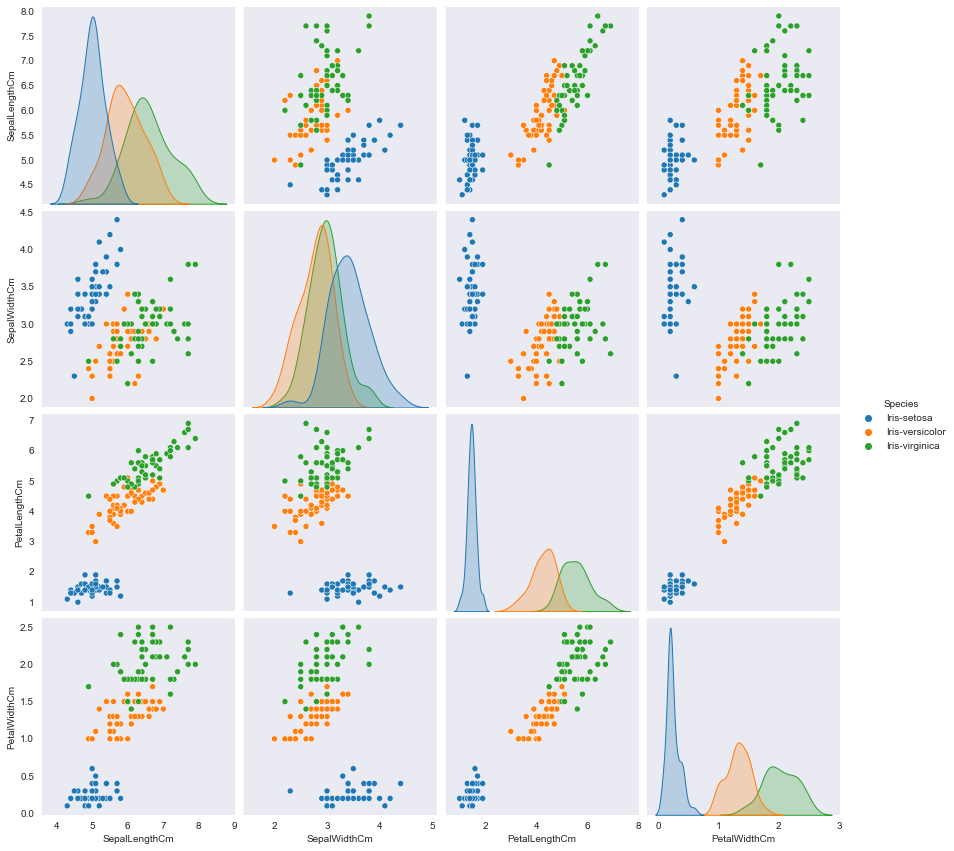

In [9]:
plt.close()
sns.set_style('dark')
sns.pairplot(e_iris,hue="Species",height=3)
plt.show()

Training & Testing the dataset

In [29]:
train,test=train_test_split(e_iris,test_size=0.4)
print(train.shape)
print(test.shape)

(90, 5)
(60, 5)


In [30]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]#training data 
train_y=train.Species#training data ouput
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #test data
test_y =test.Species#testdata output

Defining the Decision Tree Algorithm

In [31]:
decisiont=DecisionTreeClassifier(max_depth=5,random_state=0)
model = DecisionTreeClassifier().fit(train_X,train_y)
print("decision tree classifier is set ")

decision tree classifier is set 


Now, we can predict using a sample data

In [32]:
predict=model.predict(test_X)

In [33]:
X=[[2.5,3.4,1.6,2.9]]
learn=model.predict(X)
print(learn)

['Iris-setosa']


In [34]:
print('accuracy level of classifier is',"{:.4f}".format(metrics.accuracy_score(predict,test_y)))

accuracy level of classifier is 0.9667


DECISION TREE CLASSIFIER HAS 96% ACCURACY

[Text(1116.0, 1494.8999999999999, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 147\nvalue = [49, 49, 49]\nclass = Iris-Setosa'),
 Text(944.3076923076923, 1223.1, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]\nclass = Iris-Setosa'),
 Text(1287.6923076923076, 1223.1, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 98\nvalue = [0, 49, 49]\nclass = Iris-virginica'),
 Text(686.7692307692307, 951.3, 'PetalLengthCm <= 4.95\ngini = 0.171\nsamples = 53\nvalue = [0, 48, 5]\nclass = Iris-virginica'),
 Text(343.38461538461536, 679.4999999999999, 'PetalWidthCm <= 1.65\ngini = 0.042\nsamples = 47\nvalue = [0, 46, 1]\nclass = Iris-virginica'),
 Text(171.69230769230768, 407.6999999999998, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]\nclass = Iris-virginica'),
 Text(515.0769230769231, 407.6999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-versicolor'),
 Text(1030.1538461538462, 679.4999999999999, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-ve

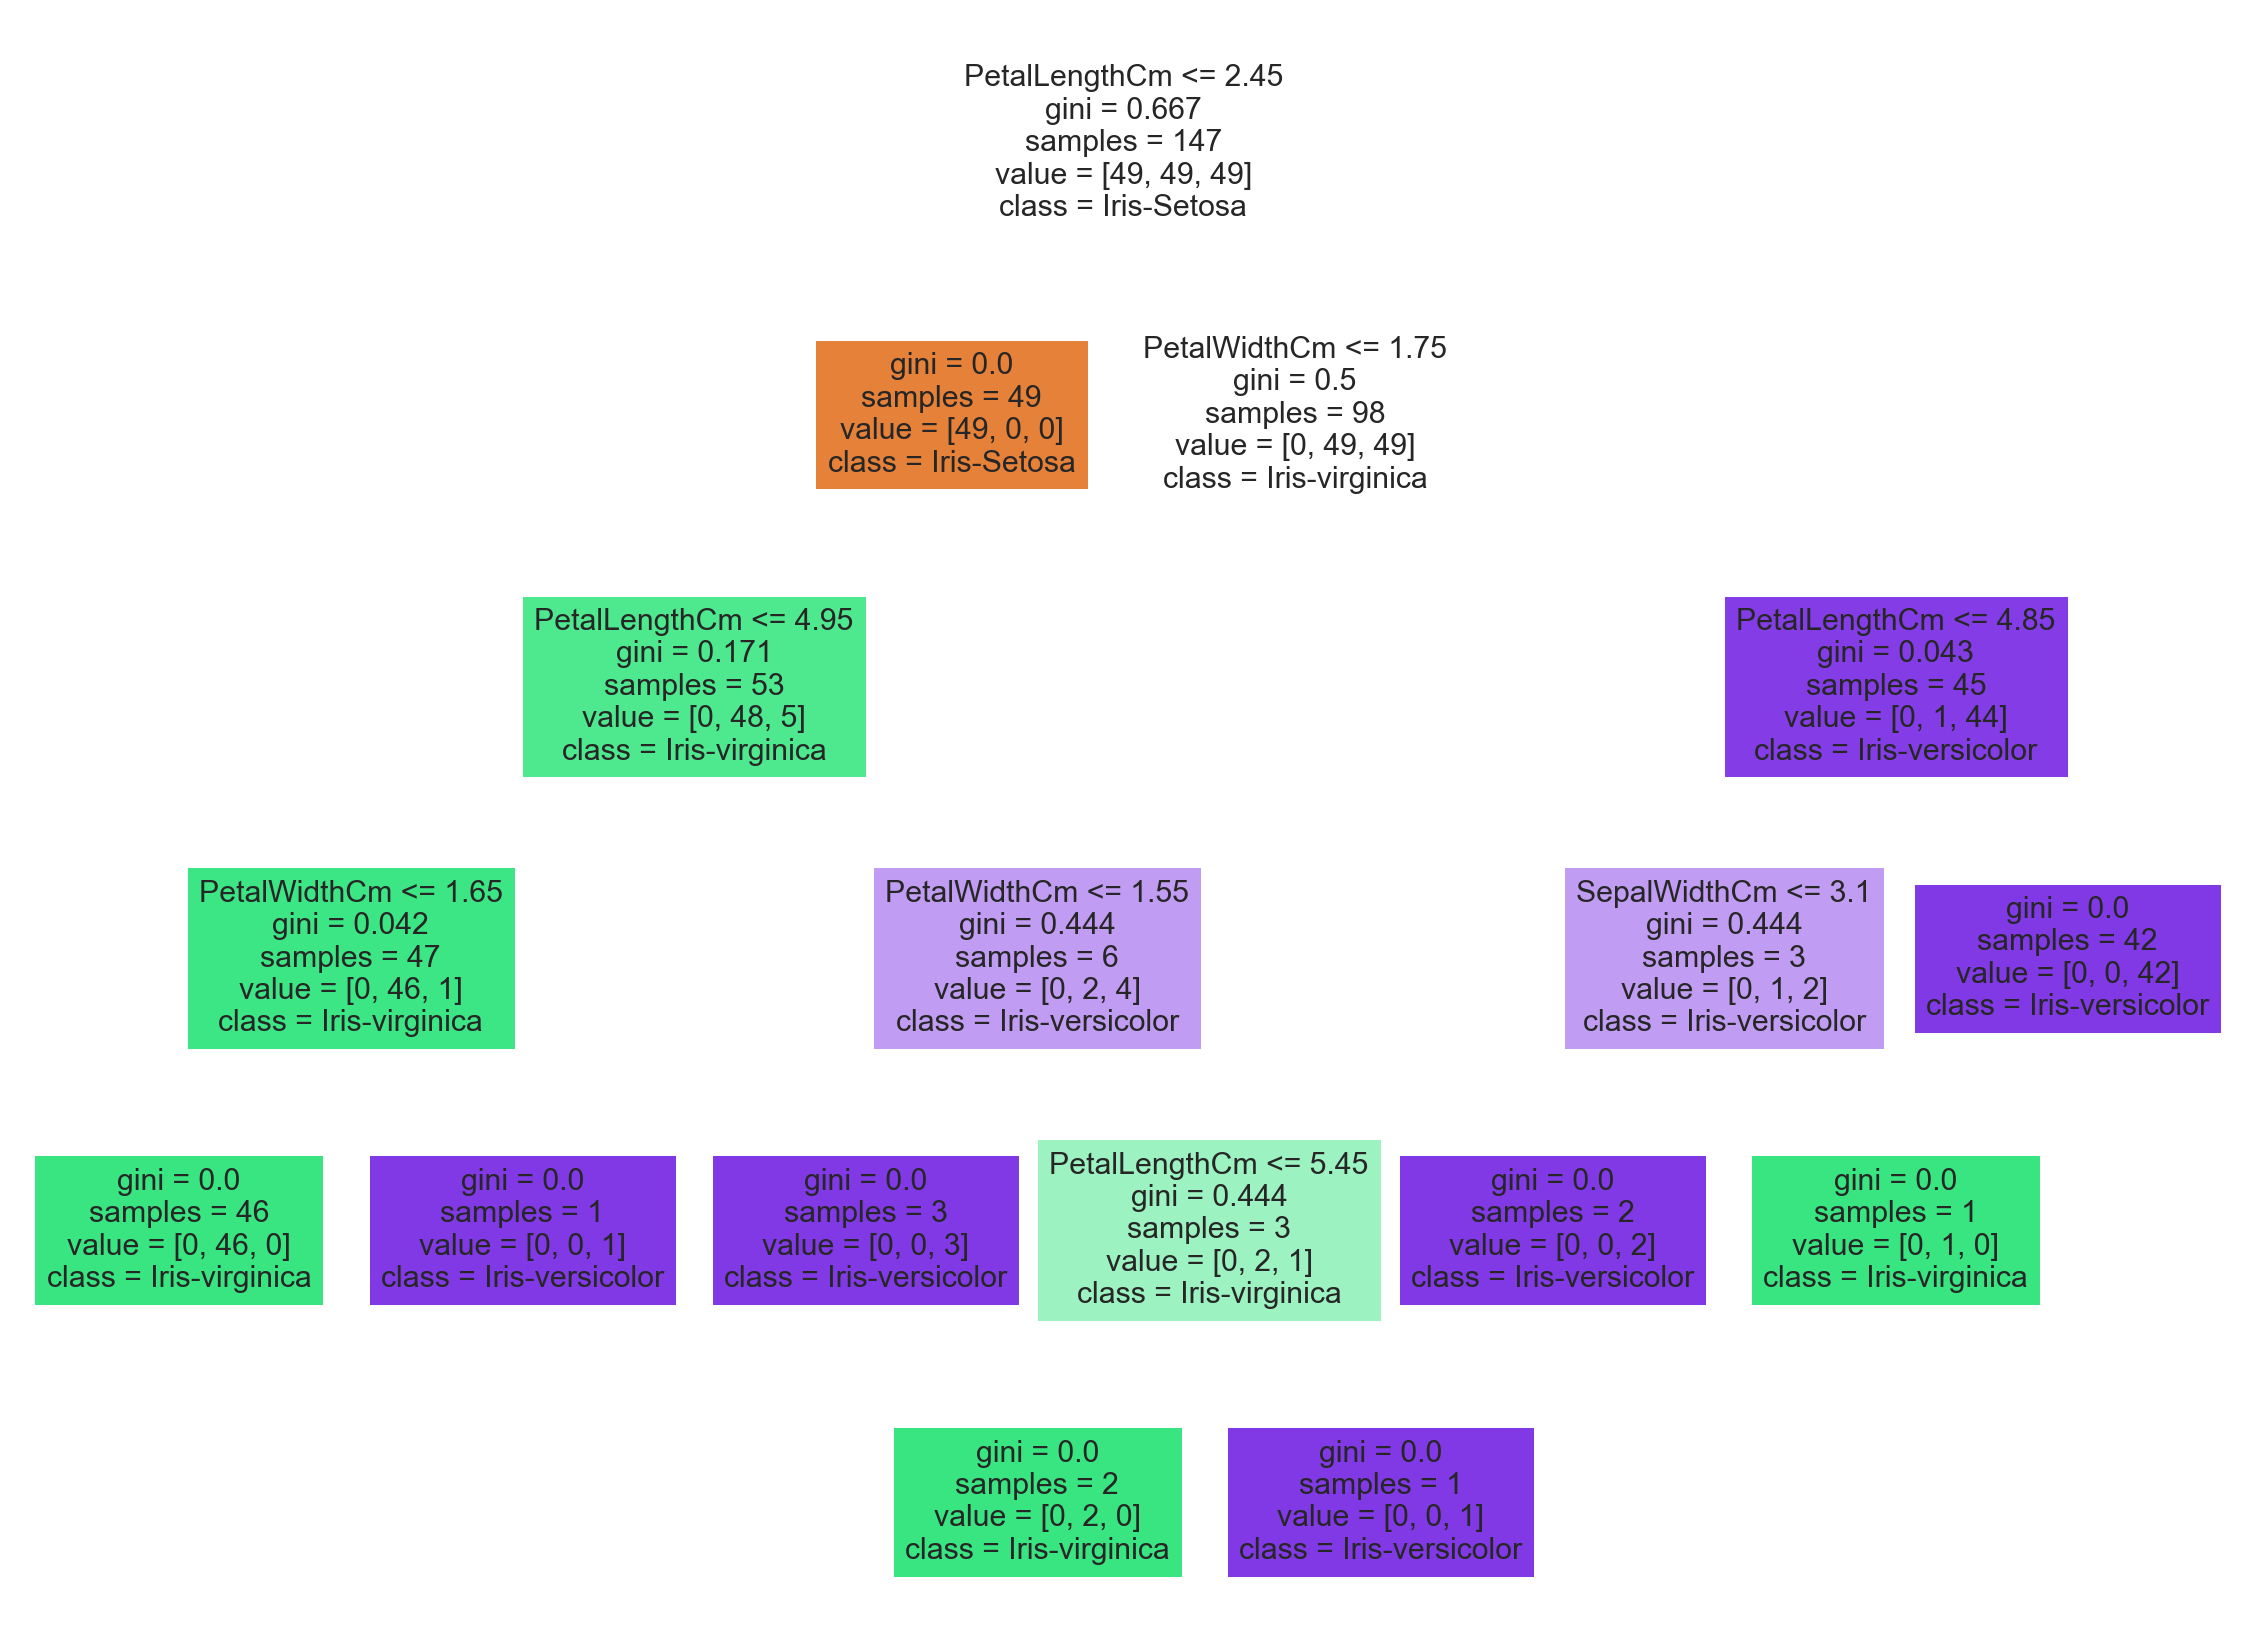

In [16]:
fig=plt.figure(figsize=(40,30))
a=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
b=['Iris-Setosa','Iris-virginica','Iris-versicolor']
plot_tree(model,feature_names=a, class_names =b,filled=True)
